## Feature Selection-Information gain - mutual information In Classification Problem Statements


**Mutual Information**
MI Estimate mutual information for a discrete target variable.


Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.


The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.


Inshort


A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

### I(X ; Y) = H(X) – H(X | Y) 
Where 
* I(X ; Y) is the mutual information for X and Y
* H(X) is the entropy for X 
* H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Split data into training and testing

In [6]:
# split data to avoid overfitting problem of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Wine',axis=1),data['Wine'],test_size=0.30,random_state=45)

In [7]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.9,1.23,2.74,428
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.7,0.62,1.71,660
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.7,1.19,2.71,1285
33,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.4,1.25,3.00,1235
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.5,1.38,3.12,278


In [9]:
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [10]:
## Mutual information in classification
from sklearn.feature_selection import mutual_info_classif

# Determine the mutual information
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.46927492, 0.28188858, 0.0732706 , 0.30603301, 0.17661281,
       0.35170981, 0.65379754, 0.11709354, 0.26017118, 0.55459457,
       0.41593333, 0.41901947, 0.54936583])

In [14]:
mutual_info = pd.Series(mutual_info) # Convert into series
mutual_info.index = X_train.columns # assign values to the features
mutual_info.sort_values(ascending=False) # Get highest values

Flavanoids              0.653798
Color.int               0.554595
Proline                 0.549366
Alcohol                 0.469275
OD                      0.419019
Hue                     0.415933
Phenols                 0.351710
Acl                     0.306033
Malic.acid              0.281889
Proanth                 0.260171
Mg                      0.176613
Nonflavanoid.phenols    0.117094
Ash                     0.073271
dtype: float64

<AxesSubplot:>

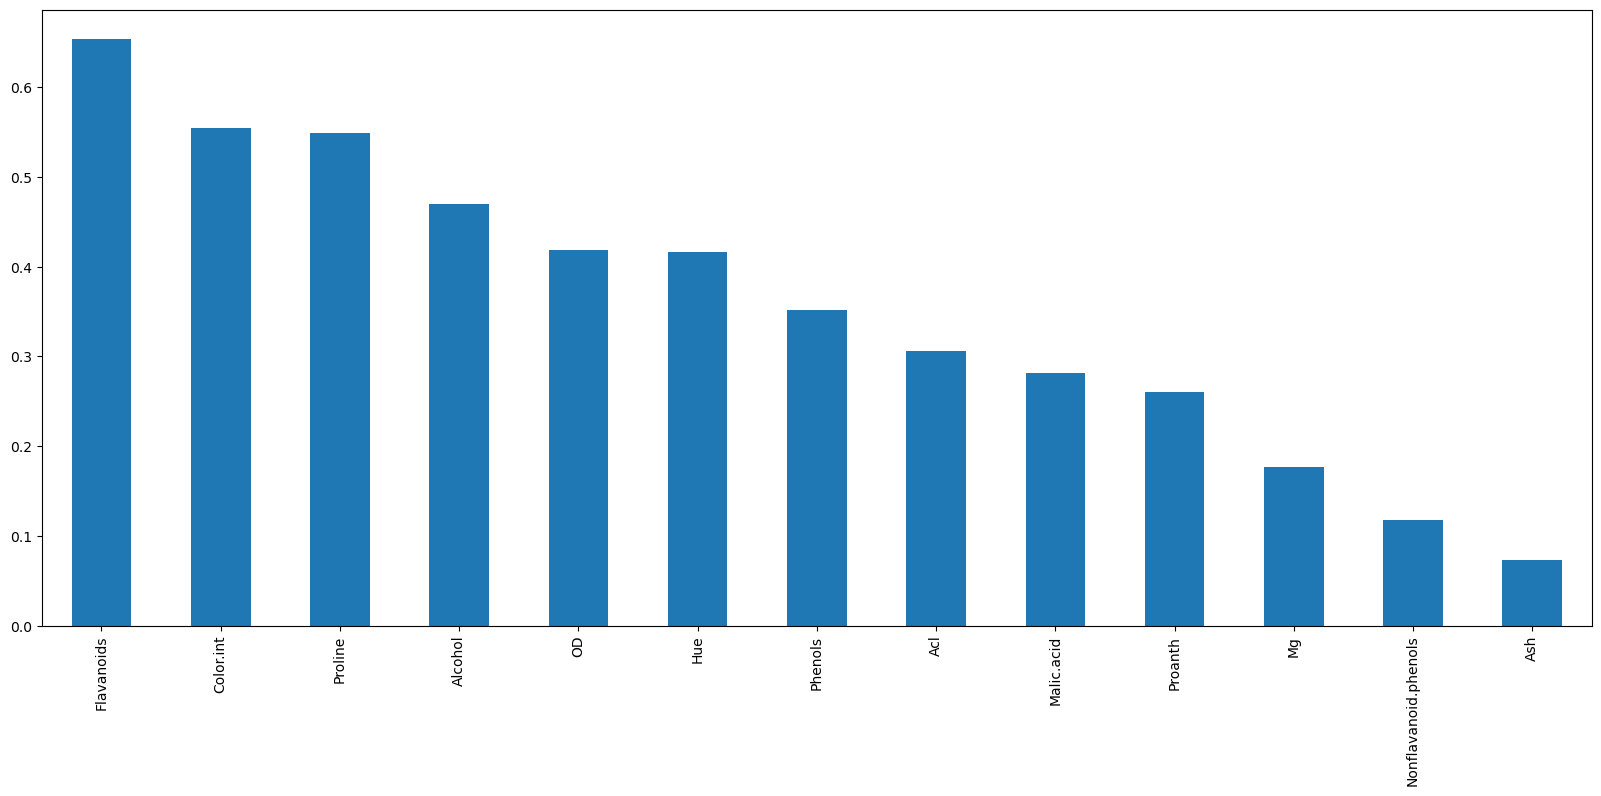

In [16]:
# Lets plot the orderd mutual_info per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [17]:
# Select required feature
from sklearn.feature_selection import SelectKBest

In [18]:
# Select top 5 important feature 
select_five_cols = SelectKBest(mutual_info_classif,k=5)
select_five_cols.fit(X_train,y_train)
X_train.columns[select_five_cols.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'Hue', 'Proline'], dtype='object')

### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

### Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information https://scikitlearn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py